In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from verify import *

In [21]:
# Load raw data
country = 'Nigeria'
region = 'Borno'
return_period = 100
no_conflict = pd.read_pickle(f'../../experiments/{country}/consumption_recovery/return_period={return_period}/conflict=False/{42}/{region}.pickle')
conflict = pd.read_pickle(f'../../experiments/{country}/consumption_recovery/return_period={return_period}/conflict=True/{42}/{region}.pickle')

In [22]:
no_conflict[0]

,is_poor,recovery_rate,c_t_unaffected,c_t
wgt,,,,
152.211388,0,0.09,1540.045862,1103.945701
0.000452,1,0.03,510.865970,453.111468
0.039266,1,0.66,771.894918,319.989933
394.076762,1,0.04,434.926003,368.789349
268.900678,1,0.15,741.938049,456.523330
...,...,...,...,...
483.303024,1,0.11,408.397704,408.397704
676.278315,1,0.09,526.997289,392.237786
270.768015,1,0.04,303.828837,260.410054


In [23]:
conflict[0].iloc[0]

is_poor              0.000000
recovery_rate        0.090000
c_t_unaffected    1539.926457
c_t               1002.651060
Name: 152.21138753920144, dtype: float64

In [24]:
no_conflict[0].iloc[0]

is_poor              0.000000
recovery_rate        0.090000
c_t_unaffected    1540.045862
c_t               1103.945701
Name: 152.21138753920144, dtype: float64

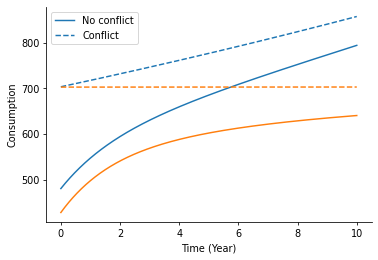

In [28]:
x = [no_conflict[t]['c_t'] for t in no_conflict.keys()]
xx = [no_conflict[t]['c_t_unaffected'] for t in no_conflict.keys()]
x = pd.concat(x, axis=1)
xx = pd.concat(xx, axis=1)
x.columns = no_conflict.keys()
xx.columns = no_conflict.keys()
ax = x.mean().plot(legend=False, color='tab:blue')
# ax = x.iloc[0,:].plot(legend=False, color='tab:blue')
xx.mean().plot(ax=ax, legend=False, linestyle='--', color='tab:blue')
y = [conflict[t]['c_t'] for t in conflict.keys()]
yy = [conflict[t]['c_t_unaffected'] for t in conflict.keys()]
y = pd.concat(y, axis=1)
yy = pd.concat(yy, axis=1)
y.columns = conflict.keys()
yy.columns = conflict.keys()
y.mean().plot(ax=ax, legend=False, color='tab:orange')
# y.iloc[0,:].plot(ax=ax, legend=False, color='tab:red')
yy.mean().plot(ax=ax, legend=False, linestyle='--', color='tab:orange')
sns.despine()
plt.xlabel('Time (Year)')
plt.ylabel('Consumption')
plt.legend(['No conflict', 'Conflict']);

In [17]:
# Load raw data
country = 'Nigeria'
low_region = 'Abia'
high_region = 'Plateau'
return_period = 100
seed = 23787155
low = pd.read_pickle(f'../../experiments/{country}/consumption_recovery/return_period={return_period}/conflict=True/{seed}/{low_region}.pickle')
high = pd.read_pickle(f'../../experiments/{country}/consumption_recovery/return_period={return_period}/conflict=True/{seed}/{high_region}.pickle')

In [18]:
poor = {}
not_poor = {}

for key, values in high.items():
    poor[key] = values[values['is_poor'] == True]
    not_poor[key] = values[values['is_poor'] == False]

In [19]:
low = poor
high = not_poor

<Axes: >

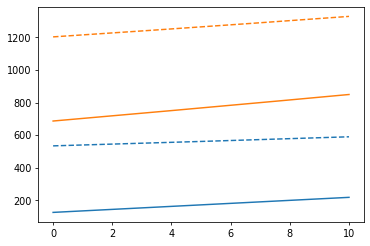

In [20]:
x = [low[t]['c_t'] for t in low.keys()]
xx = [low[t]['c_t_unaffected'] for t in low.keys()]
x = pd.concat(x, axis=1)
xx = pd.concat(xx, axis=1)
x.columns = low.keys()
xx.columns = low.keys()
ax = x.mean().plot(legend=False, color='tab:blue')
# ax = x.iloc[0,:].plot(legend=False, color='tab:blue')
xx.mean().plot(ax=ax, legend=False, linestyle='--', color='tab:blue')

y = [high[t]['c_t'] for t in high.keys()]
yy = [high[t]['c_t_unaffected'] for t in high.keys()]
y = pd.concat(y, axis=1)
yy = pd.concat(yy, axis=1)
y.columns = high.keys()
yy.columns = high.keys()
y.mean().plot(ax=ax, legend=False, color='tab:orange')
# y.iloc[0,:].plot(ax=ax, legend=False, color='tab:orange')
yy.mean().plot(ax=ax, legend=False, linestyle='--', color='tab:orange')

In [7]:
# Load the data
results = filter_and_save_consumption_data(save_results=True)

# Split it
conflict_regional_data, no_conflict_regional_data = load_consumption_data()

# Load conflict impact data
conflict_impact = pd.read_excel('../../data/processed/conflict/Nigeria.xlsx')

Processing No Conflict Runs:   0%|          | 0/12 [00:00<?, ?it/s]

Processing Conflict Runs: 100%|██████████| 12/12 [01:17<00:00,  6.43s/it]


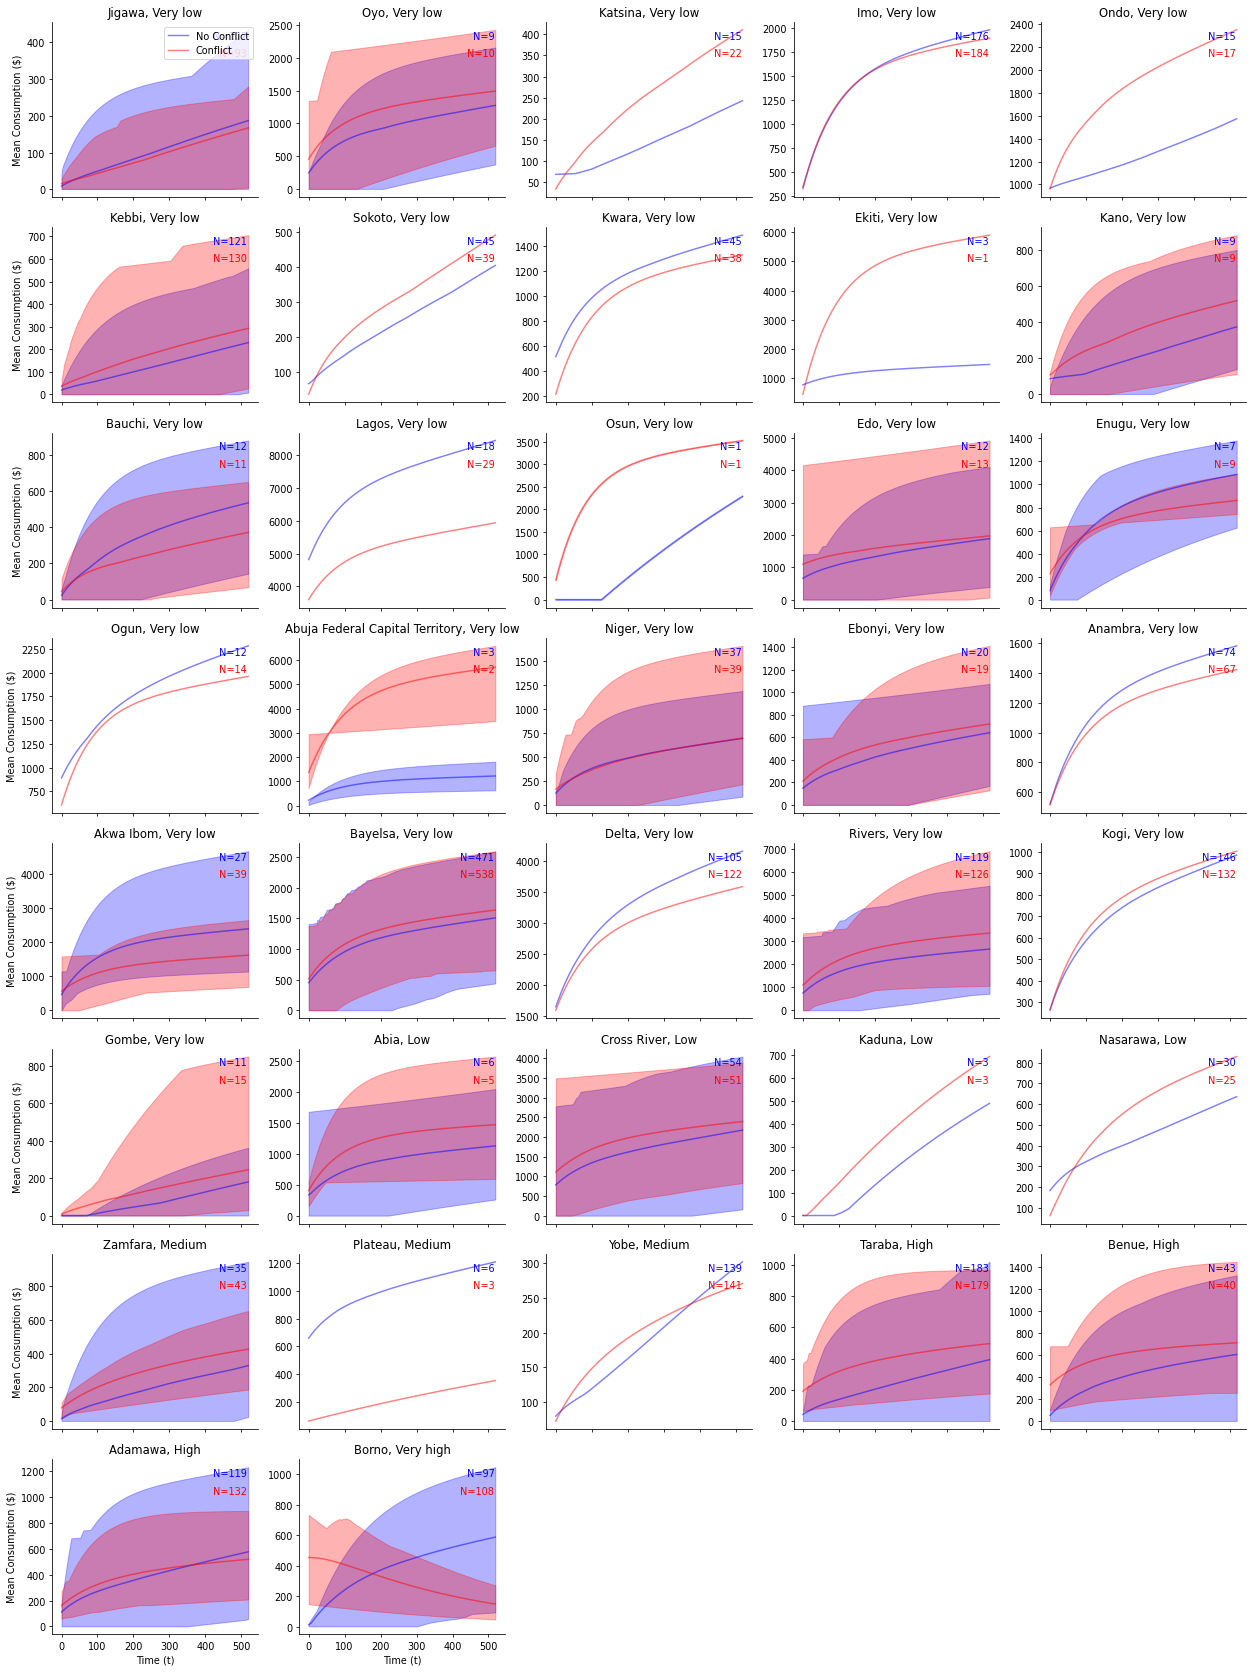

In [10]:
# Visualise mean consumption recovery for all regions
n_regions = len(no_conflict_regional_data.keys())
ncols = 5
nrows = int(n_regions / ncols) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 24), sharex=True, sharey=False)

regions_sorted = conflict_impact.sort_values('Fatalities per 100,000 people scaled')['region'].values

# Remove Borno from the list of regions
# regions_sorted = [r for r in regions_sorted if r != 'Borno']

for i, region in enumerate(regions_sorted):
    # Get the mean and quantiles for the region
    n_no_conflict = no_conflict_regional_data[region].shape[0]
    n_conflict = conflict_regional_data[region].shape[0]

    # Scaled the weights (they are index now) and round them
    x = no_conflict_regional_data[region].copy()
    x['wgt'] = [int(k / 100) for k in x.index]
    x.reset_index(drop=True, inplace=True)

    x_repeated = []
    for k, w in zip(x.index, x['wgt']):
        if w > 1:
            x_repeated.append(pd.concat([x.loc[k]] * w, axis=1).T.reset_index(drop=True))
        elif w == 1:
            x_repeated.append(x.loc[k].to_frame().T.reset_index(drop=True))
        else:
            continue
    x_repeated = pd.concat(x_repeated).reset_index(drop=True)
    x_repeated.drop('wgt', axis=1, inplace=True)

    y = conflict_regional_data[region].copy()
    y['wgt'] = [int(k / 100) for k in y.index]
    y.reset_index(drop=True, inplace=True)

    y_repeated = []
    for k, w in zip(y.index, y['wgt']):
        if w > 1:
            y_repeated.append(pd.concat([y.loc[k]] * w, axis=1).T.reset_index(drop=True))
        elif w == 1:
            y_repeated.append(y.loc[k].to_frame().T.reset_index(drop=True))
        else:
            continue
    y_repeated = pd.concat(y_repeated).reset_index(drop=True)
    y_repeated.drop('wgt', axis=1, inplace=True)

    mean_no_conflict = x_repeated.mean(axis=0).reset_index(drop=True)
    q1_no_conflict = x_repeated.quantile(0.1, axis=0).reset_index(drop=True)
    q3_no_conflict = x_repeated.quantile(0.9, axis=0).reset_index(drop=True)
    mean_conflict = y_repeated.mean(axis=0).reset_index(drop=True)
    q1_conflict = y_repeated.quantile(0.1, axis=0).reset_index(drop=True)
    q3_conflict = y_repeated.quantile(0.9, axis=0).reset_index(drop=True)

    ax = axes[int(i / ncols), i % ncols]
    
    # Plot the mean and quantiles
    mean_no_conflict.plot(ax=ax, legend=False, color='blue', alpha=0.5)
    mean_conflict.plot(ax=ax, legend=False, color='red', alpha=0.5)

    # 
    no_conflict_t0 = mean_no_conflict.iloc[0]
    conflict_t0 = mean_conflict.iloc[0]

    if no_conflict_t0 < conflict_t0:
        ax.fill_between(mean_no_conflict.index, q1_no_conflict, q3_no_conflict, alpha=0.3, color='blue')
        ax.fill_between(mean_conflict.index, q1_conflict, q3_conflict, alpha=0.3, color='red')
    
    conflict_bin = conflict_impact[conflict_impact['region'] == region]['Fatalities per 100,000 people scaled class'].values[0]
    ax.set_title(f'{region}, {conflict_bin}')
    ax.set_xlabel('Time (t)')
    # Visualise the y label only for the first column of subplots
    if i % ncols == 0:
        ax.set_ylabel('Mean Consumption ($)')
    # Visualise the legend only for the first subplot
    if i == 0:
        ax.legend(['No Conflict', 'Conflict'])

    # Add n_no_conflict and n_conflict to the right top corner of the plot
    ax.text(0.95, 0.95, f'N={n_no_conflict}', ha='right', va='top', transform=ax.transAxes, color='blue')
    ax.text(0.95, 0.85, f'N={n_conflict}', ha='right', va='top', transform=ax.transAxes, color='red')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove empty subplots
for i in range(n_regions, nrows * ncols):
    fig.delaxes(axes[int(i / ncols), i % ncols]) 
fig.tight_layout()